<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_5_Exploratory_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")


# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# TASK 1: Load the Titanic dataset
# Load the dataset from local file
df = pd.read_csv('Titanic-Dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Saving Titanic-Dataset.csv to Titanic-Dataset.csv
Dataset loaded successfully!
Shape: (891, 12)
Dataset loaded successfully!
Shape: (891, 12)


In [5]:
# TASK 2: Inspect the data
# Display the first 5 rows
print("\n=== First 5 rows ===")
print(df.head())

# Display the last 5 rows
print("\n=== Last 5 rows ===")
print(df.tail())

# Display data types
print("\n=== Data Types ===")
print(df.dtypes)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(df.describe())

# Additional inspection
print("\n=== Dataset Info ===")
print(df.info())

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== First 5 rows ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [6]:
# TASK 3: Clean and preprocess the data
# Create PclassCategory
df['PclassCategory'] = df['Pclass'].map({
    1: 'First Class',
    2: 'Second Class',
    3: 'Third Class'
})
print("\n=== PclassCategory created ===")
print(df[['Pclass', 'PclassCategory']].head())

# Create CabinCategory (whether cabin info is available or not)
df['CabinCategory'] = df['Cabin'].apply(lambda x: 'Known' if pd.notna(x) else 'Unknown')
print("\n=== CabinCategory created ===")
print(df['CabinCategory'].value_counts())

# Handle missing values in Age (using mean)
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
print(f"\n=== Age missing values filled with mean: {mean_age:.2f} ===")
print(f"Missing Age values after filling: {df['Age'].isnull().sum()}")

# Create Family feature
df['Family'] = df['SibSp'] + df['Parch']
print("\n=== Family feature created ===")
print(df[['SibSp', 'Parch', 'Family']].head(10))


=== PclassCategory created ===
   Pclass PclassCategory
0       3    Third Class
1       1    First Class
2       3    Third Class
3       1    First Class
4       3    Third Class

=== CabinCategory created ===
CabinCategory
Unknown    687
Known      204
Name: count, dtype: int64

=== Age missing values filled with mean: 29.70 ===
Missing Age values after filling: 0

=== Family feature created ===
   SibSp  Parch  Family
0      1      0       1
1      1      0       1
2      0      0       0
3      1      0       1
4      0      0       0
5      0      0       0
6      0      0       0
7      3      1       4
8      0      2       2
9      1      0       1


/tmp/ipython-input-584522785.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [7]:
# TASK 4: Identify specific data points
# Find passengers with highest fare
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]
print("\n=== Passengers with Highest Fare ===")
print(highest_fare_passengers[['Name', 'Fare', 'Pclass', 'Survived']])

# Find passengers with largest family size
largest_family_passengers = df[df['Family'] == df['Family'].max()]
print("\n=== Passengers with Largest Family Size ===")
print(largest_family_passengers[['Name', 'Family', 'SibSp', 'Parch', 'Survived']])


=== Passengers with Highest Fare ===
                                   Name      Fare  Pclass  Survived
258                    Ward, Miss. Anna  512.3292       1         1
679  Cardeza, Mr. Thomas Drake Martinez  512.3292       1         1
737              Lesurer, Mr. Gustave J  512.3292       1         1

=== Passengers with Largest Family Size ===
                                  Name  Family  SibSp  Parch  Survived
159         Sage, Master. Thomas Henry      10      8      2         0
180       Sage, Miss. Constance Gladys      10      8      2         0
201                Sage, Mr. Frederick      10      8      2         0
324           Sage, Mr. George John Jr      10      8      2         0
792            Sage, Miss. Stella Anna      10      8      2         0
846           Sage, Mr. Douglas Bullen      10      8      2         0
863  Sage, Miss. Dorothy Edith "Dolly"      10      8      2         0


In [8]:
# TASK 5: Demonstrate Pandas Series and DataFrame functionalities
# Create a Pandas Series of passenger names
names_series = pd.Series(df['Name'].values, index=df['PassengerId'])
print("\n=== Names Series (first 5) ===")
print(names_series.head())

# Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']].copy()
print("\n=== Names and Ages DataFrame ===")
print(names_ages_df.head())

# Slice to show only passengers older than 50
older_passengers = df[df['Age'] > 50][['Name', 'Age', 'Sex', 'Survived']]
print(f"\n=== Passengers Older than 50 (Total: {len(older_passengers)}) ===")
print(older_passengers.head(10))


=== Names Series (first 5) ===
PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
dtype: object

=== Names and Ages DataFrame ===
                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

=== Passengers Older than 50 (Total: 64) ===
                                 Name   Age     Sex  Survived
6             McCarthy, Mr. Timothy J  54.0    male         0
11           Bonnell, Miss. Elizabeth  58.0  female         1
15   Hewlett, Mrs. (Mary D Kingcome)   55.0  fe

In [9]:
# TASK 6: Multi-indexing
# Create multi-index DataFrame grouped by Sex and Pclass
multi_index_df = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])
multi_index_df.columns = ['Survival_Rate', 'Count']
print("\n=== Multi-Index DataFrame: Survival by Sex and Pclass ===")
print(multi_index_df)


=== Multi-Index DataFrame: Survival by Sex and Pclass ===
               Survival_Rate  Count
Sex    Pclass                      
female 1            0.968085     94
       2            0.921053     76
       3            0.500000    144
male   1            0.368852    122
       2            0.157407    108
       3            0.135447    347


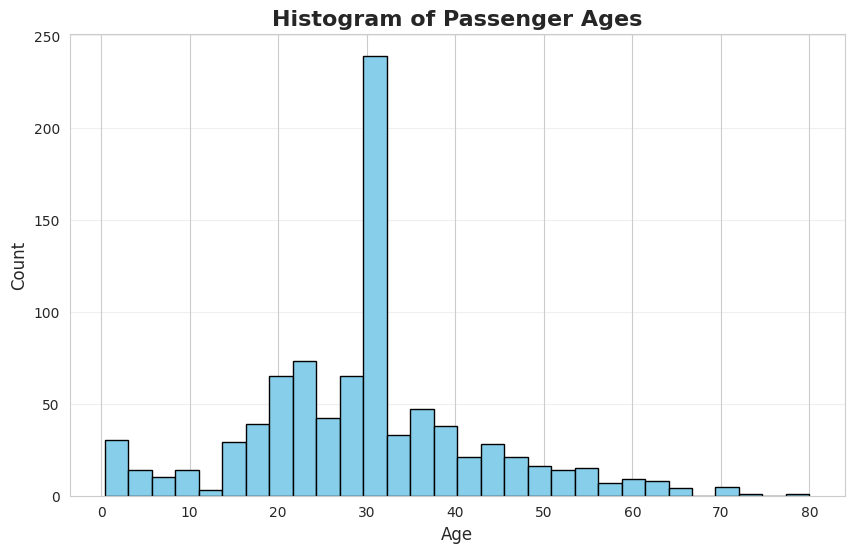

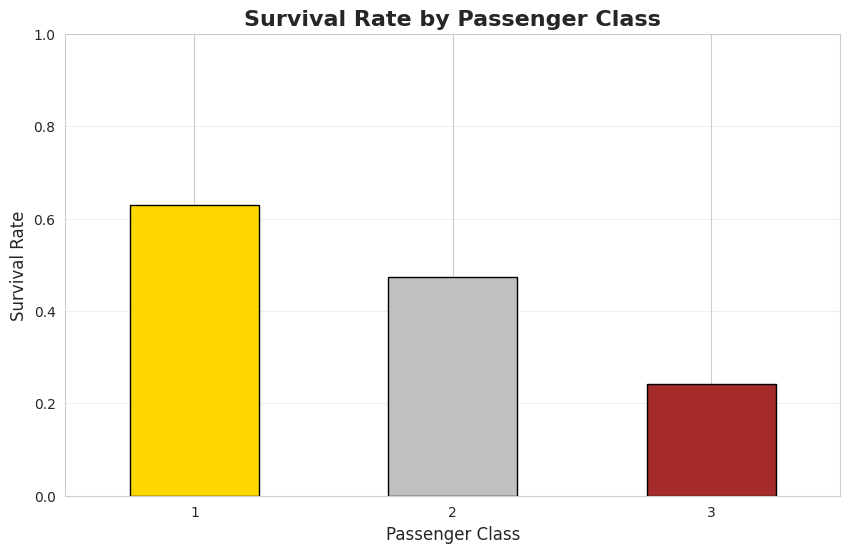

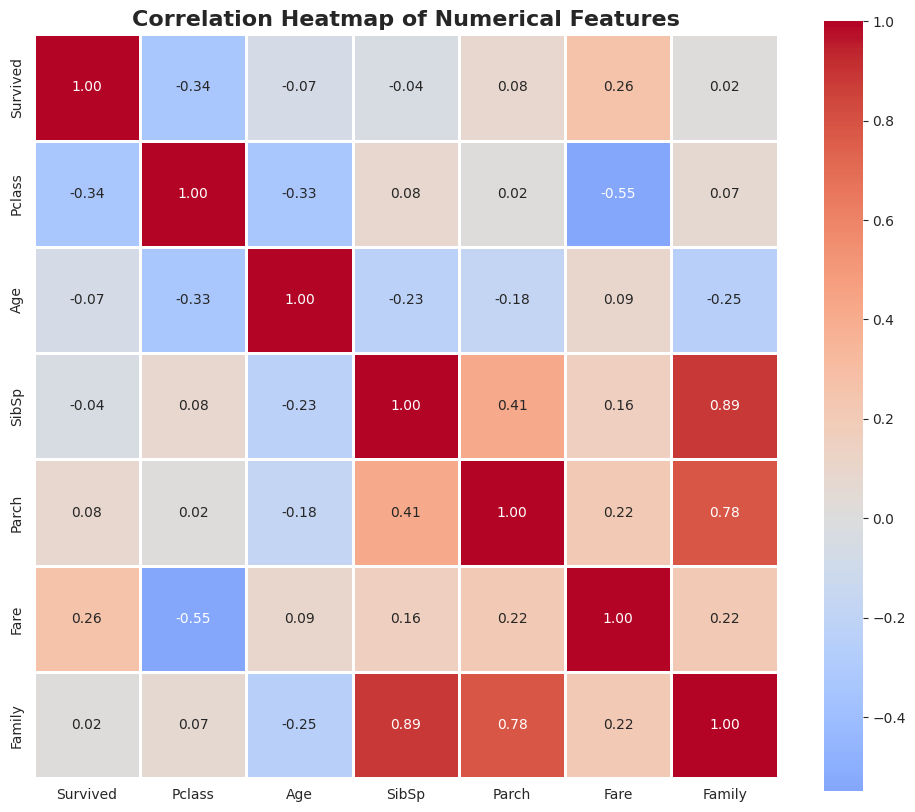

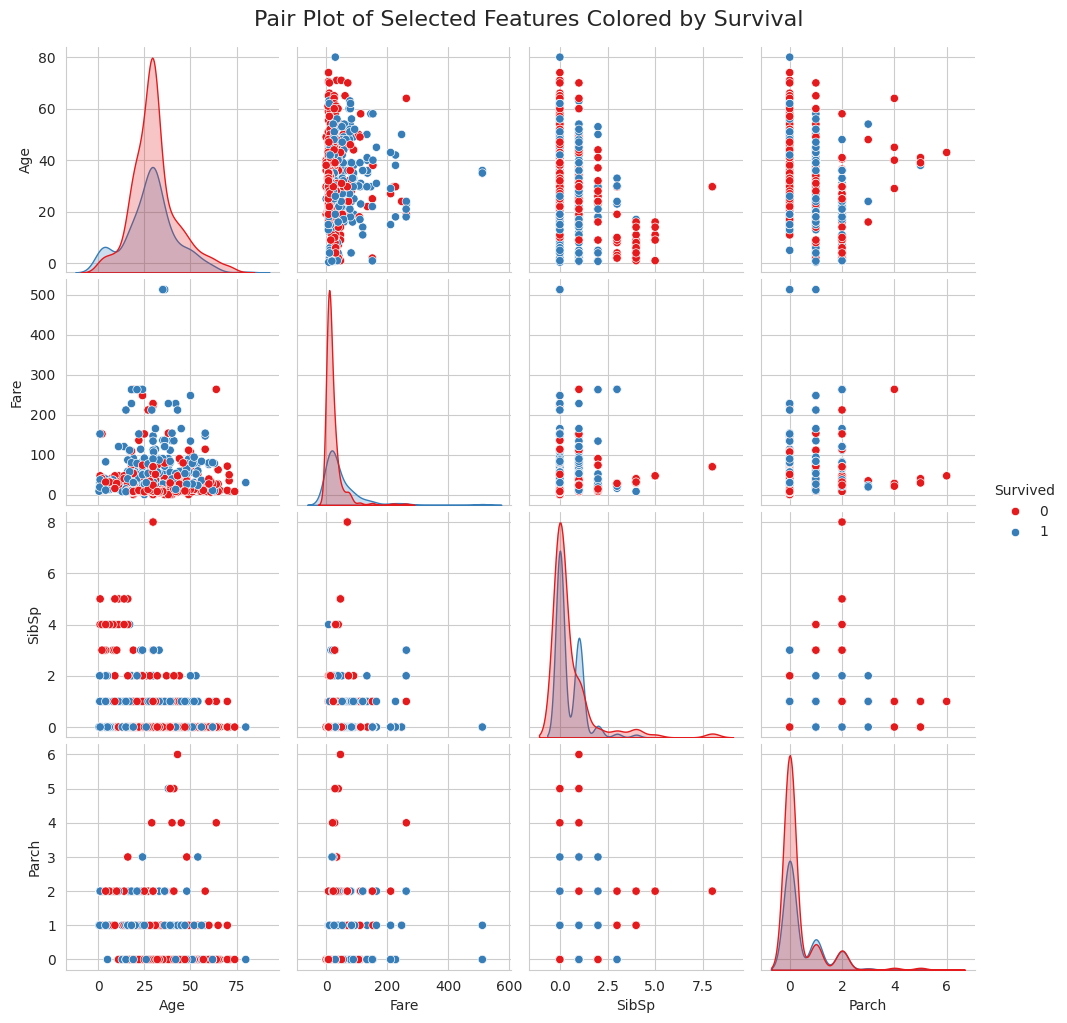

In [10]:
# TASK 7: Visualizations
# Histogram of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Passenger Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Bar plot of survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(10, 6))
survival_by_class.plot(kind='bar', color=['gold', 'silver', 'brown'], edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Heatmap of correlation between numerical features
plt.figure(figsize=(12, 10))
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

# Pair plot
pair_plot_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.pairplot(df[pair_plot_cols], hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features Colored by Survival', y=1.02, fontsize=16)
plt.show()


=== Survival Rates by Sex ===
        Survival_Rate  Total_Count
Sex                               
female       0.742038          314
male         0.188908          577


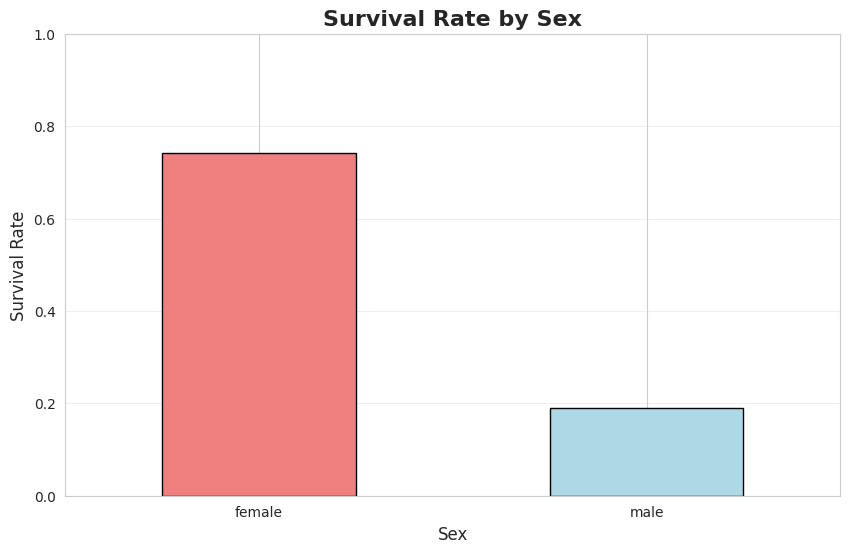


=== Survival Rates by Passenger Class ===
        Survival_Rate  Total_Count
Pclass                            
1            0.629630          216
2            0.472826          184
3            0.242363          491


In [11]:
# TASK 8: Analyze survival rates
# Survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].agg(['mean', 'count'])
survival_by_sex.columns = ['Survival_Rate', 'Total_Count']
print("\n=== Survival Rates by Sex ===")
print(survival_by_sex)

# Visualization
plt.figure(figsize=(10, 6))
survival_by_sex['Survival_Rate'].plot(kind='bar', color=['lightcoral', 'lightblue'],
                                       edgecolor='black')
plt.title('Survival Rate by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Survival rates by class (already calculated above)
survival_by_pclass = df.groupby('Pclass')['Survived'].agg(['mean', 'count'])
survival_by_pclass.columns = ['Survival_Rate', 'Total_Count']
print("\n=== Survival Rates by Passenger Class ===")
print(survival_by_pclass)

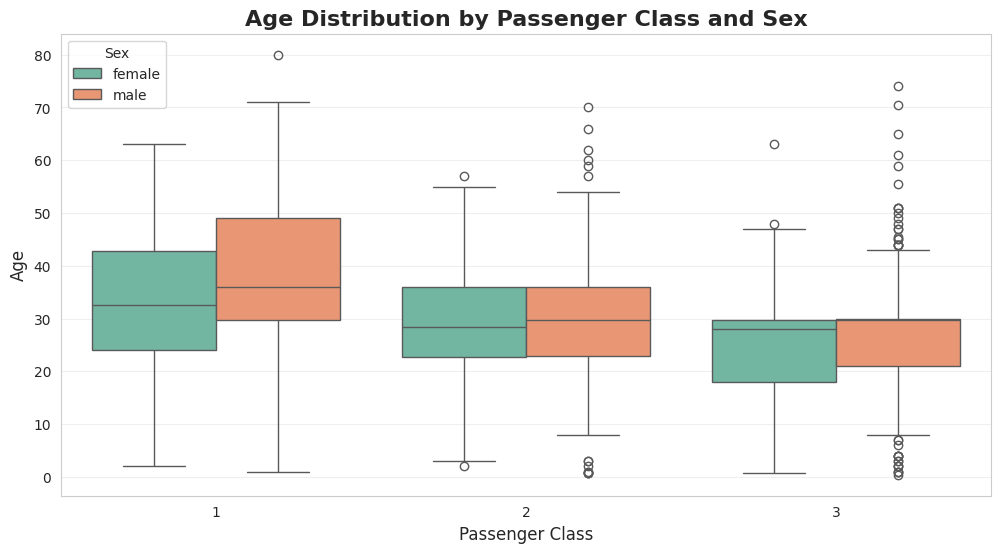

In [12]:
# TASK 9: Analyze age distribution
# Box plot of age distribution by class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex', palette='Set2')
plt.title('Age Distribution by Passenger Class and Sex', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Sex')
plt.grid(axis='y', alpha=0.3)
plt.show()


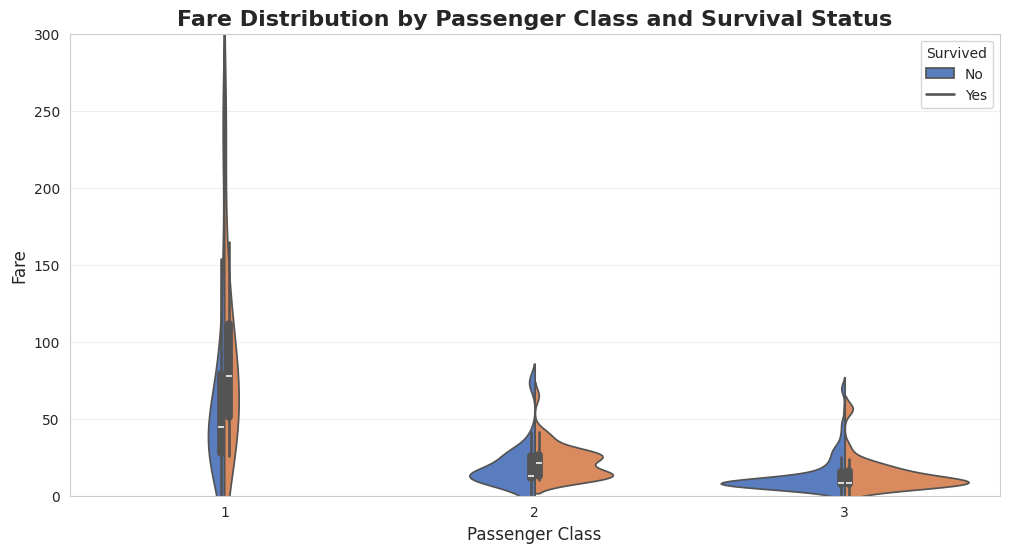


EDA tasks completed successfully!


In [13]:
# TASK 10: Analyze fare distribution
# Violin plot of fare distribution by class and survival
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived',
               split=True, palette='muted')
plt.title('Fare Distribution by Passenger Class and Survival Status',
          fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.ylim(0, 300)  # Limit for better visualization
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n" + "="*70)
print("EDA tasks completed successfully!")
print("="*70)